In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import re

import config_error_by_period_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_error_by_period(df: pd.core.frame.DataFrame) -> None:
    """Plot error by period"""
    df_average = df[-1:]
    dim = config.epoch // config.period
    data_to_visualize = df_average.iloc[:, :dim]

    x_labels = list(range(0, config.epoch, config.period))

    plt.figure(figsize=(10, 6))
    # plt.plot(x_labels, data_to_visualize.values[0], marker='o', linestyle='-')
    plt.plot(x_labels, data_to_visualize.values[0], linestyle='-')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.show()

In [4]:
def plot_error_by_period_multiple_with_labels(df_list: list, labels: list) -> None:
    """Plot error by period for multiple dataframes"""
    plt.figure(figsize=(10, 6))

    dim = config.epoch // config.period
    x_labels = list(range(0, config.epoch, config.period))

    for i, (df, label) in enumerate(zip(df_list, labels)):
        df_average = df[-1:]
        data_to_visualize = df_average.iloc[:, :dim]

        # Use regular expression to match label and extract case number
        match = re.search(r'Case (\d+)', label)
        if match:
            case_number = int(match.group(1)) - 1  # Subtract 1 to match with color_dict index
        else:
            case_number = i  # Default to index if label doesn't match

        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        plt.plot(x_labels, data_to_visualize.values[0], linestyle='-', color=color, label=label)

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.legend()
    plt.show()

## Case 1

In [5]:
case1_df = load_csv_data(config.case1_error_by_period_path)
case1_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,1.99748,2.01741,2.00246,2.16933,2.13696,2.33123,2.05975,2.07967,1.99001,1.73846,...,0.637600,0.871719,0.906588,0.839341,0.816925,0.764622,0.774584,0.901606,NaN,193.683
1,1.99748,2.04729,2.01741,2.15439,2.22413,2.22662,2.26149,2.27643,1.64381,1.64381,...,0.799491,0.886663,0.742206,0.794509,0.819416,0.647563,0.737225,0.933984,NaN,188.555
2,1.99748,2.01243,2.02488,2.20669,2.28141,2.10956,2.03733,1.97756,1.93771,1.82314,...,0.914059,0.754659,0.824397,0.983797,0.961381,0.869228,0.881681,0.879191,NaN,192.274
3,1.99748,2.00246,2.02737,2.05975,2.31130,2.34866,2.20669,2.06971,1.56411,1.50683,...,0.702356,0.717300,0.926513,0.836850,0.981306,0.729753,0.762131,0.901606,NaN,188.712
4,1.99748,2.01990,2.02986,2.21417,2.22413,2.18677,2.07967,2.05477,1.95763,1.65377,...,0.856775,0.836850,0.851794,0.924022,0.919041,0.983797,0.996250,1.043570,NaN,195.178
5,1.99748,2.00744,2.03235,2.19424,2.33621,2.20918,2.00246,2.03484,1.80072,1.81567,...,0.642581,0.777075,0.946438,0.909078,0.734734,0.717300,0.722281,0.792019,NaN,187.355
6,1.99748,2.04231,2.00993,2.15439,2.23409,2.19424,1.98254,2.07220,1.74842,1.97507,...,0.712319,0.712319,0.694884,0.963872,0.829378,0.742206,0.692394,0.762131,NaN,186.750
7,1.99748,2.09213,2.01741,2.18926,2.20918,2.29885,2.13945,2.00495,1.81318,1.78329,...,0.886662,0.871719,0.804472,0.797000,0.699866,0.757150,1.011190,1.083420,NaN,187.268
8,1.99748,2.06224,2.02737,2.16186,2.17183,2.20420,2.12201,2.32624,1.55664,1.75589,...,0.734734,0.749678,0.948928,0.849303,0.929003,0.824397,0.809453,0.988778,NaN,190.632
9,1.99748,2.04729,2.01243,2.17930,2.29387,2.18428,2.13198,2.21666,1.80321,1.73597,...,0.816925,0.806962,0.824397,0.854284,0.797000,0.829378,0.894134,0.792019,NaN,192.353


In [6]:
# Get last row using values[] 
case1_df_average = case1_df[-1:]
dim = config.epoch // config.period
case1_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,1.99748,2.03509,2.02015,2.16834,2.24231,2.22936,2.10234,2.1113,1.78154,1.74319,...,0.782056,0.764373,0.77035,0.798494,0.847062,0.875206,0.848805,0.786539,0.828133,0.907833


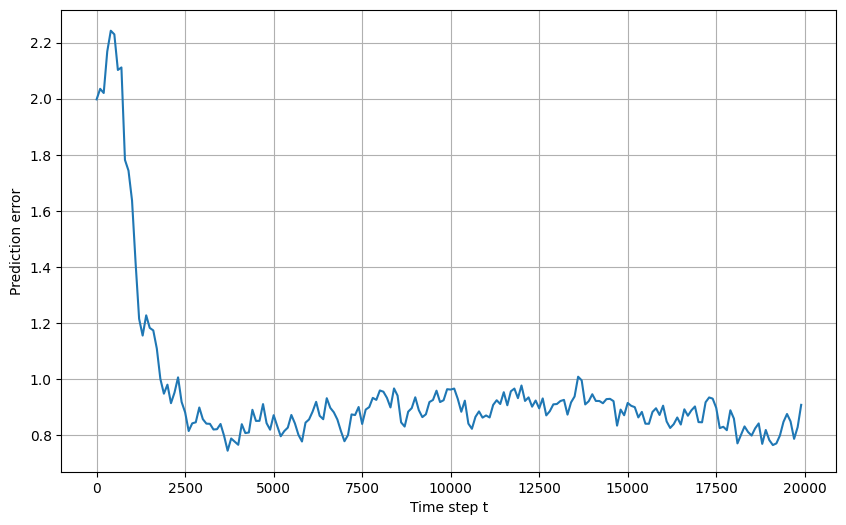

In [7]:
plot_error_by_period(df=case1_df)

# Case 2

In [8]:
case2_df = load_csv_data(config.case2_error_by_period_path)
case2_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,1.99250,3.13819,3.22536,2.87667,2.66497,2.86422,2.59025,2.36609,2.24156,2.46572,...,2.49062,2.37855,2.47817,2.86422,2.14194,2.19175,2.07967,2.92648,NaN,478.848
1,2.10458,3.15064,3.33744,3.01366,2.73969,2.47817,2.47817,2.55289,2.57780,2.81441,...,2.85177,2.46572,2.50308,2.57780,2.71478,2.70233,2.86422,2.36609,NaN,462.285
2,1.99250,2.97630,3.38725,3.17555,2.57780,2.85177,2.41591,2.22911,2.24156,2.34119,...,2.27892,2.05477,2.70233,2.19175,2.30383,2.50308,2.44081,2.27892,NaN,492.745
3,2.02986,3.54914,3.48687,2.85177,2.62761,2.76459,2.62761,2.37855,2.50308,2.56534,...,2.25402,2.22911,2.42836,2.10458,2.06722,2.20420,2.16684,2.46572,NaN,488.897
4,1.96759,3.23781,3.61141,2.88913,2.57780,3.20045,2.82686,2.82686,2.36609,2.26647,...,2.41591,2.90158,2.22911,2.15439,2.14194,2.45327,2.09212,2.47817,NaN,460.492
5,2.06722,3.83556,3.38725,3.28763,3.22536,2.77705,2.52798,2.20420,2.59025,2.39100,...,2.21666,2.73969,2.54044,2.90158,2.66497,2.81441,2.59025,2.41591,NaN,487.079
6,2.15439,3.86047,4.12198,3.36234,2.57780,2.65252,2.52798,2.24156,2.51553,2.47817,...,2.51553,2.25402,2.56534,2.87667,2.47817,2.35364,2.25402,2.66497,NaN,482.397
7,2.14194,3.39970,3.34989,3.48687,2.29138,1.94269,2.30383,2.32873,2.65252,2.45327,...,2.51553,2.59025,1.98005,2.09212,1.99250,2.19175,1.95514,2.41591,NaN,481.002
8,2.09212,3.22536,3.57405,3.10083,2.85177,2.46572,2.21666,2.29138,2.86422,2.54044,...,1.95514,2.55289,2.00495,1.86797,2.22911,2.44081,2.12948,2.20420,NaN,479.968
9,2.02986,3.74839,3.96009,3.71103,2.90158,2.30383,2.55289,2.26647,2.35364,2.49063,...,2.39100,2.25402,2.60270,2.86422,2.78950,2.45327,2.56534,2.72723,NaN,482.173


In [9]:
# Get last row using values[] 
case2_df_average = case2_df[-1:]
dim = config.epoch // config.period
case2_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,2.05726,3.41216,3.54416,3.17555,2.70357,2.6301,2.50681,2.36858,2.49063,2.48066,...,2.50806,2.53919,2.38851,2.44206,2.40345,2.44953,2.3524,2.43085,2.31379,2.49436


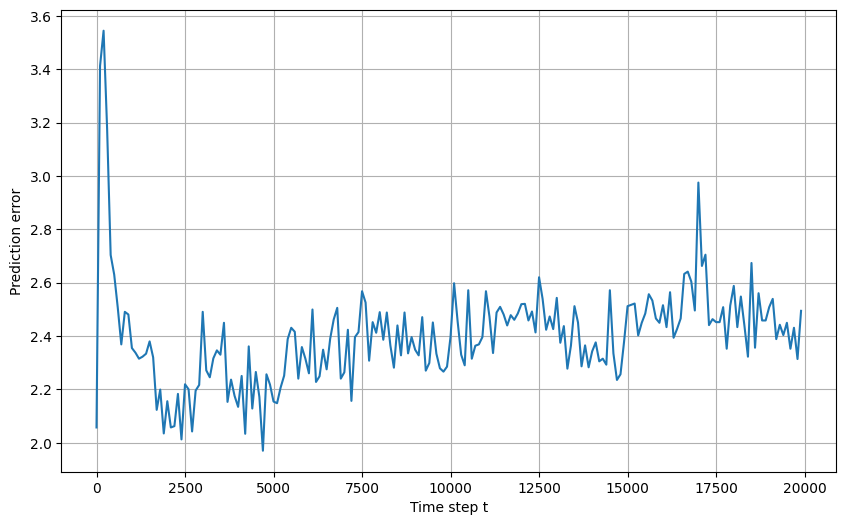

In [10]:
plot_error_by_period(df=case2_df)

# Case 3

In [11]:
case3_df = load_csv_data(config.case3_error_by_period_path)
case3_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,1.995,1.98750,2.01625,2.05250,2.08625,2.05250,2.14500,2.33750,2.19875,2.35000,...,0.97250,1.00375,1.01000,0.95625,0.88875,0.96625,1.02375,1.08000,NaN,249.372
1,1.995,1.98750,2.01500,2.07500,2.10125,2.08625,2.17000,2.28375,2.21125,2.30875,...,1.06125,1.01000,1.14500,1.24875,1.20125,1.09625,1.19625,1.15250,NaN,248.888
2,1.995,1.98750,2.02500,2.04500,2.10000,2.10875,2.10000,2.26500,2.05875,2.35375,...,1.03625,0.99625,1.05875,1.03500,0.99500,0.93750,1.05125,1.12125,NaN,248.040
3,1.995,2.01250,2.02750,2.05500,2.08125,2.13250,2.19875,2.27500,2.39125,2.03125,...,1.24500,1.20500,1.28625,1.18875,1.19000,1.25375,1.27375,1.14375,NaN,254.150
4,1.995,1.98750,2.01500,2.05125,2.06000,2.12500,2.20500,2.24375,2.18500,2.21250,...,1.10375,1.12000,1.13000,1.09500,1.07125,1.07000,1.06750,1.12750,NaN,255.074
5,1.995,1.98750,2.03625,2.04250,2.07875,2.09500,2.18625,2.19000,2.23375,2.37250,...,1.13250,1.01500,0.98625,0.96000,1.15750,1.18875,1.24500,1.13625,NaN,249.973
6,1.995,2.00000,2.02875,2.05625,2.05750,2.08750,2.10750,2.22375,2.32375,2.02500,...,1.06250,1.20750,1.11875,1.19875,1.21125,1.10375,1.02250,1.09000,NaN,251.914
7,1.995,2.01250,2.01875,2.05375,2.08125,2.12625,2.12000,2.31875,2.35000,1.98000,...,1.13625,1.08250,1.06875,1.05625,1.06500,1.09875,1.10250,1.16500,NaN,247.877
8,1.995,2.01250,2.02125,2.07250,2.06500,2.18750,2.20125,2.27375,2.22000,1.95375,...,1.10250,1.02625,1.06875,0.98375,1.01625,1.09625,0.91625,1.05375,NaN,245.785
9,1.995,1.98750,2.01250,2.05125,2.07750,2.08500,2.11500,2.19875,2.36250,2.35750,...,0.96000,1.00125,1.03250,0.91500,1.05000,1.05250,1.03875,1.15000,NaN,248.196


In [12]:
# Get last row using values[] 
case3_df_average = case3_df[-1:]
dim = config.epoch // config.period
case3_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,1.995,1.99625,2.02162,2.0555,2.07888,2.10862,2.15487,2.261,2.2535,2.1945,...,1.053,1.09787,1.08125,1.06675,1.0905,1.06375,1.08462,1.08637,1.09375,1.122


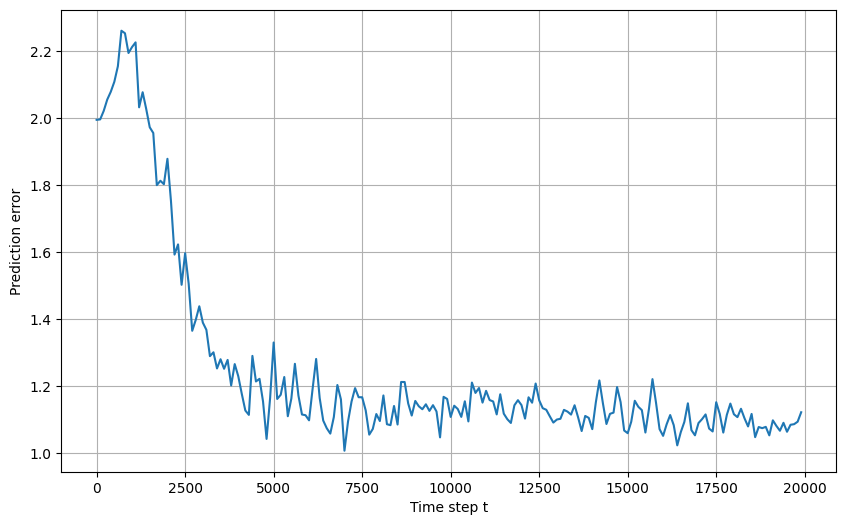

In [13]:
plot_error_by_period(df=case3_df)

# Case 4

In [14]:
case4_df = load_csv_data(config.case4_error_by_period_path)
case4_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,2,2.01000,2.02500,2.00375,2.01500,2.11125,2.08000,2.21125,2.30625,2.32000,...,0.64375,0.6350,0.69125,0.663750,0.56125,0.746250,0.44000,0.56250,NaN,238.343
1,2,2.04125,2.03250,2.00625,2.08500,2.05000,2.07375,2.33250,2.28250,2.25750,...,0.70250,0.7000,0.69625,0.708750,0.74875,0.646250,0.62500,0.64750,NaN,243.020
2,2,2.03250,2.04375,2.02250,2.03125,2.09625,2.07875,2.29000,2.45375,2.15000,...,0.67250,0.6275,0.60000,0.660000,0.83625,0.580000,0.74125,0.71625,NaN,243.171
3,2,2.02875,2.01250,2.01875,2.03875,2.08000,2.16125,2.16750,2.27500,2.38000,...,0.58750,0.5400,0.61875,0.572500,0.60750,0.607500,0.54000,0.56500,NaN,233.145
4,2,2.05500,2.03625,1.99500,2.02625,2.15625,2.09250,2.23125,2.22000,2.48500,...,0.80500,0.7250,0.64750,0.722500,0.60625,0.522500,0.61000,0.62375,NaN,239.397
5,2,2.02750,2.02750,2.00250,2.03625,2.15125,2.08875,2.23500,2.40625,2.22375,...,0.75375,0.6775,0.61875,0.698750,0.61000,0.556250,0.49250,0.61875,NaN,247.301
6,2,2.01000,2.02125,2.04250,2.08375,2.13500,2.11125,2.10875,2.08125,2.21125,...,0.77750,0.4950,0.61125,0.621250,0.70125,0.617500,0.49000,0.45500,NaN,242.510
7,2,2.00750,2.01375,2.01625,2.02875,2.10625,2.09625,2.14625,2.23875,1.99625,...,0.78500,0.8000,0.73750,0.670000,0.57500,0.531250,0.64625,0.47375,NaN,242.454
8,2,2.02750,2.01375,2.01375,2.06500,2.06125,2.15625,2.11625,2.29750,2.13750,...,0.75625,0.6325,0.61000,0.882500,0.75500,0.573750,0.49125,0.54875,NaN,239.286
9,2,2.02875,2.02875,2.05375,2.06625,2.04250,2.21375,2.25500,2.27500,1.99125,...,0.72625,0.7275,0.73125,0.606250,0.70875,0.677500,0.60625,0.69875,NaN,241.790


In [15]:
# Get last row using values[] 
case4_df_average = case4_df[-1:]
dim = config.epoch // config.period
case4_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,2,2.02687,2.0255,2.0175,2.04763,2.099,2.11525,2.20937,2.28362,2.21525,...,0.73225,0.727375,0.721,0.656,0.65625,0.680625,0.671,0.605875,0.56825,0.591


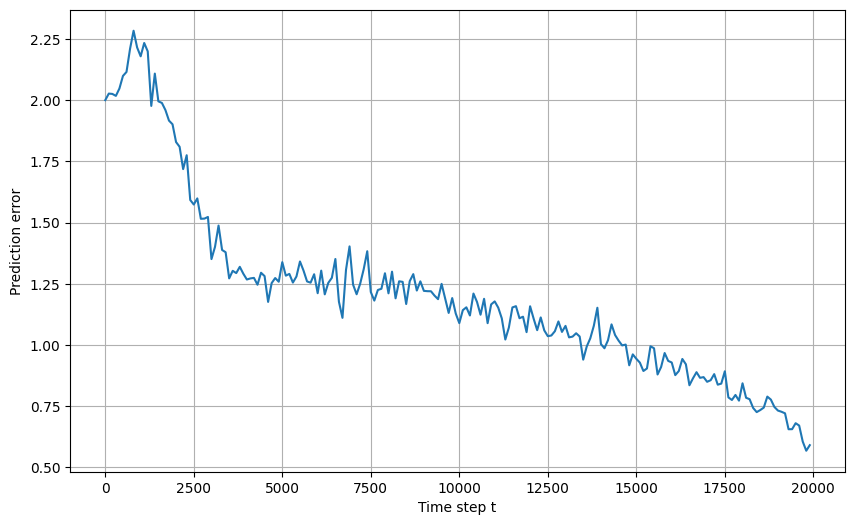

In [16]:
plot_error_by_period(df=case4_df)

## Summary

In [17]:
data_list = []

# The following are the case labels you want to pass
labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
# labels = ['Case 1', 'Case 4']

# The following are the case labels you want to pass
data_list.append(case1_df)    # Add error values for Case 1
data_list.append(case2_df)    # Add error values for Case 2
data_list.append(case3_df)    # Add error values for Case 3
data_list.append(case4_df)    # Add error values for Case 4

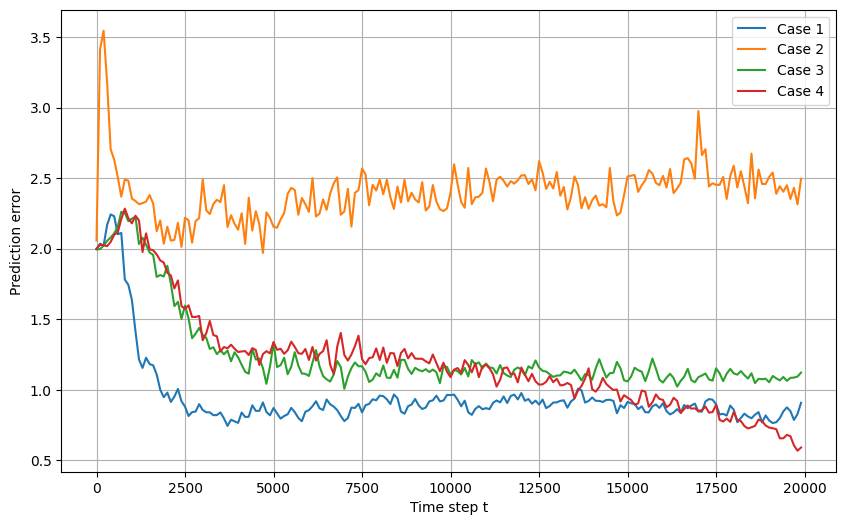

In [18]:
# plot_error_by_period_multiple(df_list=data_list)
plot_error_by_period_multiple_with_labels(df_list=data_list, labels=labels)